<a href="https://colab.research.google.com/github/amoghgadagi/Kaggle_Notebooks/blob/main/PyTorch%2BMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch torchvision

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F

In [ ]:
transform=transforms.Compose([transforms.ToTensor(), #converts numpy array from (0,255) to (0,1) float tensor
                              transforms.Normalize((0.5,), (0.5,)), # normalizing around mean = 0.5 (0.5, 0.5, 0.5) is along all three channels, normalizing helps reduce skewness and distortion and helps efficient learning, also where augmentation takes place
                              transforms.Resize((28,28))]) 
training_dataset= datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset= datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size= 100, shuffle=True) ## Similar to ImageDataGenerator flow from directory
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=100, shuffle=False)

In [ ]:
# Function to plot image from the dataset

def image_convert(tensor):
  image = tensor.clone().detach().numpy() # tensor passed has shape(1, 28, 28), new dimension is added along 0th dimension and hence need to changed to the third dimension 2
  image = image.transpose(1, 2, 0) # this helps in transposing the color channel to 3rd dimension
  image = image*np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # de normalizing the image, also called de processing
  image = image.clip(0, 1) # PyTorch torch. clamp() method clamps all the input elements into the range [ min, max ] and return a resulting tensor
  return image

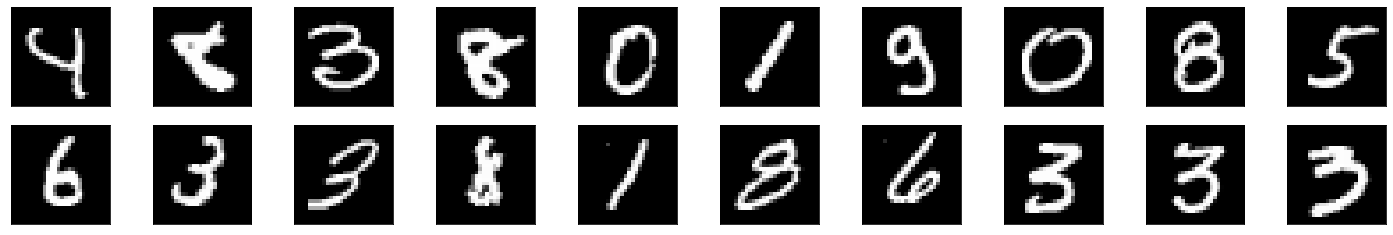

In [ ]:
dataiter = iter(training_loader) # creates an object that allows us to go through iterable training loader one at a time, accesing one element at a time\
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))
for index in np.arange(20):
  fig.add_subplot(2,10,index+1, xticks=[], yticks=[]) # index+1 because index cannot be 0
  plt.imshow(image_convert(images[index]))
  # ax.set_title([labels[index].item()])



In [ ]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x


In [ ]:
model=Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs= 12
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for e in range(epochs):
  running_loss = 0.
  running_corrects = 0.
  val_running_loss = 0.
  val_running_corrects = 0.
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss +=loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
        
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

  
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

    print('epoch :', (e+1))
    print('training loss: {:.4f}, {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))


    

training loss: 0.4432, acc 86.9100 
validation loss: 0.2425, validation acc 92.8700 
epoch : 1
training loss: 0.4432, 86.9100
validation loss: 0.2425, 92.8700
training loss: 0.2144, acc 93.5317 
validation loss: 0.1784, validation acc 94.5900 
epoch : 2
training loss: 0.2144, 93.5317
validation loss: 0.1784, 94.5900
training loss: 0.1496, acc 95.5467 
validation loss: 0.1251, validation acc 96.0600 
epoch : 3
training loss: 0.1496, 95.5467
validation loss: 0.1251, 96.0600
training loss: 0.1181, acc 96.4033 
validation loss: 0.1109, validation acc 96.3400 
epoch : 4
training loss: 0.1181, 96.4033
validation loss: 0.1109, 96.3400
training loss: 0.0982, acc 96.9650 
validation loss: 0.0974, validation acc 96.9700 
epoch : 5
training loss: 0.0982, 96.9650
validation loss: 0.0974, 96.9700
training loss: 0.0838, acc 97.4433 
validation loss: 0.1123, validation acc 96.2800 
epoch : 6
training loss: 0.0838, 97.4433
validation loss: 0.1123, 96.2800
training loss: 0.0746, acc 97.6783 
validation

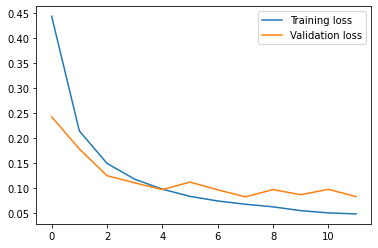

In [ ]:
plt.plot(running_loss_history, label='Training loss')
plt.plot(val_running_loss_history, label='Validation loss')
plt.legend()


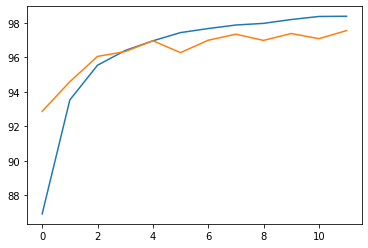

In [ ]:
plt.plot(running_corrects_history, label= 'training accuracy')
plt.plot(val_running_corrects_history, label = 'validation accuracy')

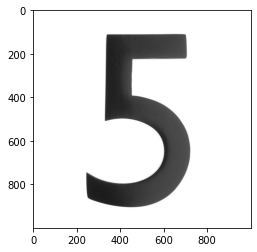

In [ ]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
import PIL.ImageOps

In [ ]:
# img = PIL.ImageOps.invert(img)
# img = img.convert('1')
# img = transform(img) 
# plt.imshow(image_convert(img))

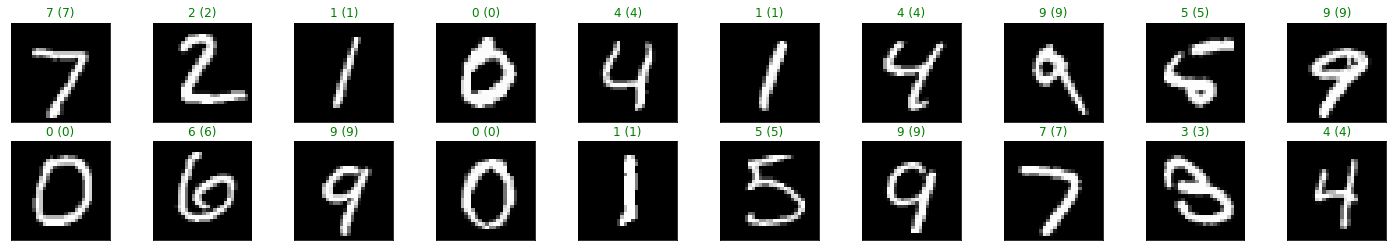

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(image_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))
